# Week 5 Discussion: Linear Regression

*Originally by Jerry Lin.*
*Minor edits from Alex Chohlas-Wood.*

In [2]:
# Setup 
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Background

We all love learning, right? Well... at the very least, we care about the grades. 

In this discussion session, we, as a group of applied statisticians who are constantly thinking about real-world high-impact applications, are going to explore if we can predict the final exam scores using homework scores using a synthetic (but realistic enough) dataset.

After all, grades are all that matters (kidding).

## Dataset

The dataset contains scores of five homework assignments and a final exam 
for 100 (hypothetical) students who took a statistics class from 
last year.
Even though it is early-ish in this quarter and we've only received feedback for the first 3 homeworks for this (hypothetical) class we are taking, we'd like to build a model to predict our final exam scores in this class using only the first few homework scores, so that we are able to forecast our (good) grades early, and enjoy peace of mind.

Specifically, suppose we have observed our first 3 homework scores as 100, 85, and 95, can we predict our final exam scores?

To answer this question, we will start by analyzing the data and fitting a simple regression model using only the score from hw1.
Then we will fit another model using all 3 homework scores, and examine the model closely.

First, let's load the data and plot hw1 scores and final exam scores as a scatterplot.

Parsed with column specification:
cols(
  hw1 = col_double(),
  hw2 = col_double(),
  hw3 = col_double(),
  hw4 = col_double(),
  hw5 = col_double(),
  final = col_double()
)


hw1,hw2,hw3,hw4,hw5,final
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
98,100,71,73,90,78
96,82,84,99,48,80
100,100,100,93,83,82
65,80,40,83,89,59
83,97,26,71,100,95
100,100,80,100,100,89
80,92,60,59,83,63
87,85,68,79,100,92
89,88,77,91,100,87


hw1,hw2,hw3,hw4,hw5,final
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
98,100,71,73,90,78
96,82,84,99,48,80
100,100,100,93,83,82
65,80,40,83,89,59
83,97,26,71,100,95
100,100,80,100,100,89


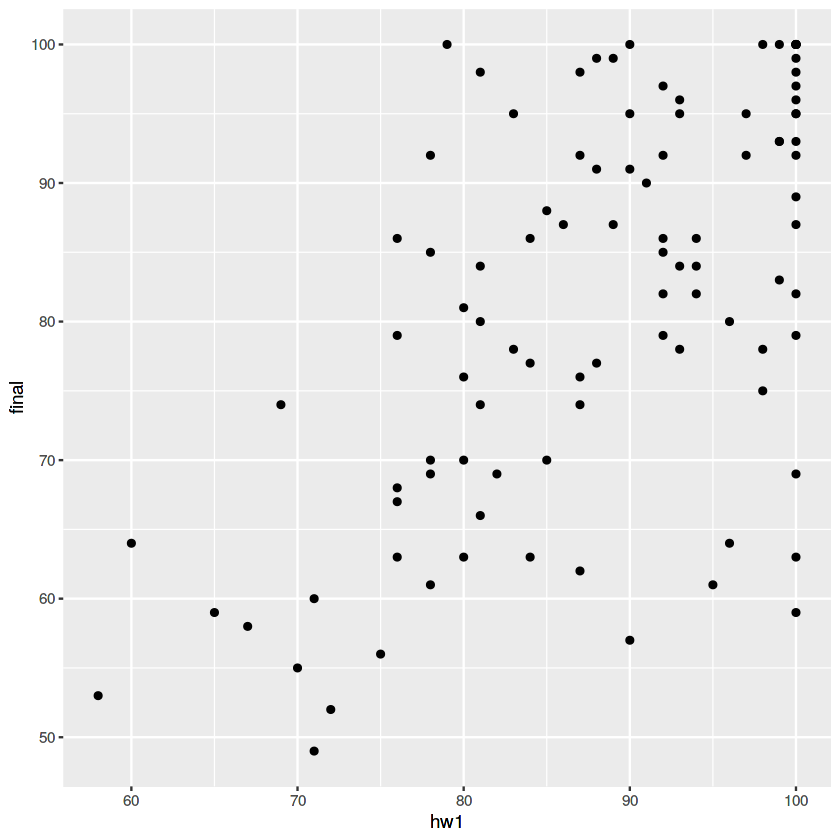

In [47]:
data <- read_csv("scores.csv")

head(data)

# Your code here! 
# Make a scatterplot, with hw1 scores on the x-axis, and final test scores on the y-axis.

# START solution

data %>%
    ggplot(aes(x = hw1, y = final)) +
    geom_point()

# END solution

In the plot, it seems like there is a positive relationship between `hw1` 
and final exam scores. 
Now, we would like to quantitatively measure this (linear) relationship between
the two variables.

# Correlation

To achieve this, we define the correlation coefficient $\rho_{X,Y}$ between two random variable $X$ and $Y$ to be

\begin{align}
\rho_{X,Y} &= \frac{\mathrm{cov}(X, Y)}{\sigma_X\sigma_Y} \\ 
  & = \mathbb{E} \left[ \frac{(X-\mu_X)}{\sigma_X} 
  \frac{(Y-\mu_Y)}{\sigma_Y} \right]
\end{align}

In other words, the definition above shows that we can think of the correlation as the covariance of $X$ and $Y$
scaled by the individual variance of $X$ and $Y$.

The correlation coefficient ranges from -1 to +1, where -1 indicates a perfect
downhill (negative) linear relationship and +1 indicates a perfect uphill
(positive) linear relationship.


To illustrate this, the following plot shows how different values of correlation $\rho$ appear in a scatterplot:

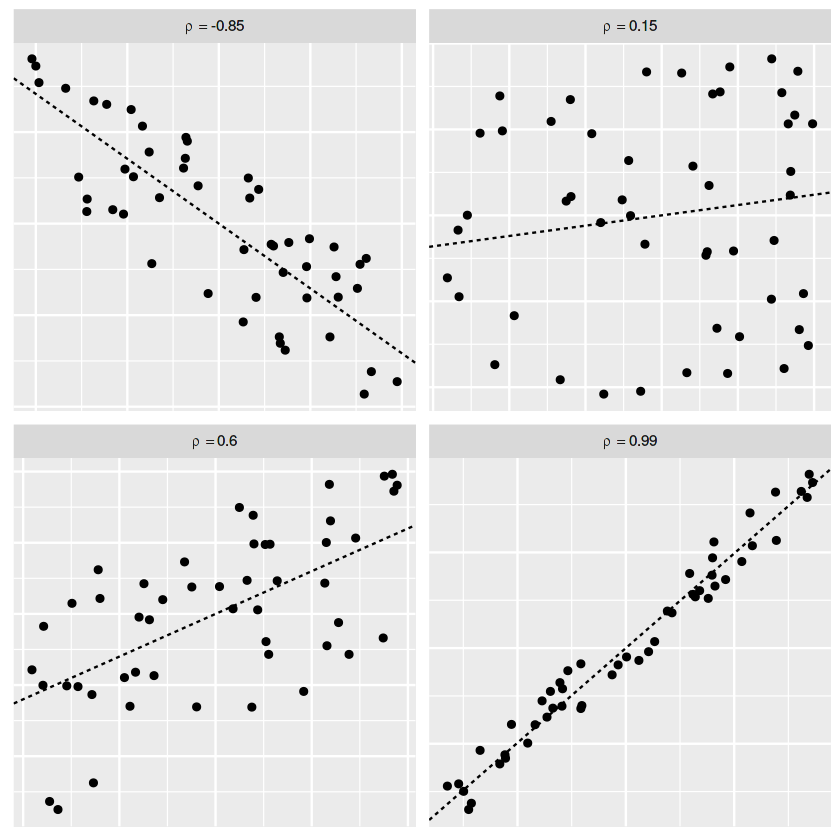

In [15]:
rhos <- sort(c(0.99, -.85, .6, .15))

get_by_rho <- function(rho, n = 50) {
  X1 <- runif(n)
  X2 <- runif(n)
  Y <- rho*X1 + sqrt(1 - rho^2)*X2
  tibble(X = X1 - mean(X1), Y = Y - mean(Y))
}
d <- tibble(rho = rhos) %>% 
  mutate(data = map(rho, get_by_rho)) %>% 
  unnest(data)
  
ggplot(d, aes(x = X, y = Y)) +
  geom_abline(aes(intercept = 0, slope = rho), linetype = "dashed") +
  geom_point() +
  facet_wrap(~ rho, scales = "free", labeller = label_bquote(rho == .(rho))) +
  theme(
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank()
    )

Empirically, the sample correlation between $X$ and $Y$ from a dataset can be estimated as:

$$
r_{X,Y} = \frac{1}{n}\sum_{i=1}^{n}\frac{X_i - \bar{X}}{\hat{\sigma}_X}\frac{Y_i - \bar{Y}}{\hat{\sigma}_Y}
$$

Which might look a little painful, but lucky for us, `R` comes with a `cor()`
function which calculates the correlation coefficient between two vectors.

Going back to our original example, we can calculate the correlation coefficient
for `hw1` scores and `final` scores as

In [35]:
# Your code here!
# Use R's cor() function to calculate the correlation between the hw1 column and the final scores column.

# HINT: Use R's built-in $ method for accessing columns. 
# For example, data$hw2 returns just the values in column hw2.

# START solution

cor(data$hw1, data$final)

# END solution

[1] 0.5959981

... which suggests a fairly strong positive correlation.

# Linear Regression

Now, let's model this relationship between `hw1` and final scores using 
simple linear regression.
Recall that simple linear regression is just a model with a
single explanatory variable, where we are trying to find the "best fitting" line
through the points to represent the relationship between the covariate (or the predictor) and the outcome (or the response).

## Review

Under the framework of simple linear regression, we assume that the true 
underlying relationship between $X$ and $Y$ is

$$Y = \beta_0 + \beta_1 X + \varepsilon \quad \textrm{where} \quad
\varepsilon \sim N(0, \sigma^2).$$

Notice that in this model, the randomness is in $\varepsilon$,
which we are using to represent the *error term*, which captures
unobserved factors and/or random variations that influence the value of $Y$.
Due to this unobserved randomness, our linear model will not perfectly predict every possible data point.
Instead, what we predict is the *average* value of $Y$ given the observed $X$.

$$
\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X
$$

Within the observed data, $\hat{\beta}_1$ indicates *on average* how much 
$Y$ increased when $X$ increased by 1 unit;
$\hat{\beta}_0$ indicates the average value of $Y$ when $X = 0$. 

<!-- Hence, we can rewrite the model in terms of $\varepsilon$

$$
\varepsilon = 
Y - \beta_0 + \beta_1 X
$$

where $Y$ and $X$ are the observed data, and the regression coefficients 
$\beta_0$ and $\beta_1$ are the parameters we wish to estimate.
We then estimate $\varepsilon$ via the empirical counterpart of the error,
the *residual*:

$$
\hat{\varepsilon} = Y - \hat{\beta}_0 + \hat{\beta}_1 X
$$ -->


## Fitting a simple linear regression model

Now, let's fit a simple linear model on our dataset:

In [17]:
# Your code here!
# Fit a simple linear regression predicting final scores using hw1 scores.

# HINT: for simple linear regression, use the following syntax:
# mod <- lm(y ~ x, data = df)
# Where you replace x and y with your column names, and df with your dataframe
# Then type summary(mod) to see the summary of your model.

# START solution

mod <- lm(final ~ hw1, data=data)
summary(mod)

# END solution


Call:
lm(formula = final ~ hw1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.206  -7.387   1.005   8.494  26.036 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.1007     9.9160   0.918    0.361    
hw1           0.8211     0.1117   7.348 6.08e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.6 on 98 degrees of freedom
Multiple R-squared:  0.3552,	Adjusted R-squared:  0.3486 
F-statistic: 53.99 on 1 and 98 DF,  p-value: 6.078e-11


We observe that $\hat{\beta}_0 = 9.1$ and
$\hat{\beta}_1 = 0.82$.
This suggests that on average when a student's `hw1` score improved by 10 units,
the final exam score improved by 8.2 points.

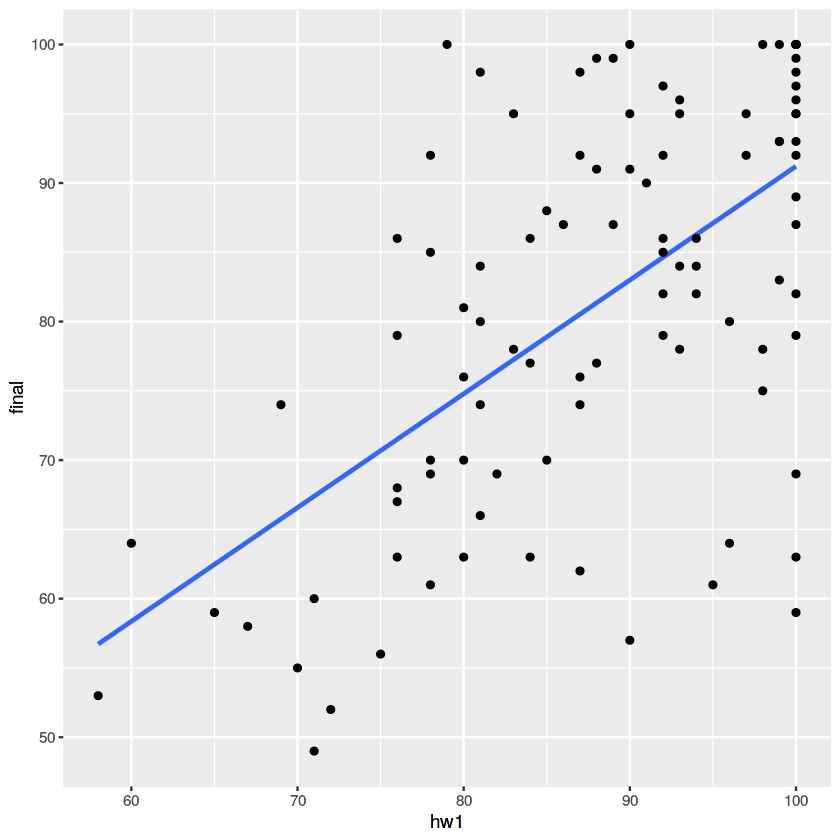

In [38]:
# Your code here!
# Add the simple linear regression line to your scatterplot.

# HINT: use ggplot's built-in geom_smooth() function to plot the line as follows:
# geom_smooth(formula = y ~ x, method = "lm", se = FALSE) 
# (No need to replace variable names this time)

# START solution

ggplot(data, aes(x = hw1, y = final)) +
  geom_smooth(formula = y ~ x, method = "lm", se = FALSE) +
  geom_point()

# END solution

## Multiple regression

Now, let's expand our regression to include all three homework scores.

In [39]:
# Your code here!
# Fit a multiple linear regression predicting final test scores using hw1, hw2, and hw3 scores.

# HINT: Use the following syntax:
# multi_mod <- lm(y ~ a + b + c, data = df)
# Then use summary() like we did above to inspect the results.

# START solution

multi_mod <- lm(final ~ hw1 + hw2 + hw3, data = data)
summary(multi_mod)

# END solution


Call:
lm(formula = final ~ hw1 + hw2 + hw3, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.656  -6.610   1.058   6.830  24.180 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.68252   10.76825   0.342 0.733114    
hw1          0.40084    0.15039   2.665 0.009025 ** 
hw2          0.28340    0.13298   2.131 0.035630 *  
hw3          0.24534    0.06981   3.514 0.000675 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.84 on 96 degrees of freedom
Multiple R-squared:  0.4488,	Adjusted R-squared:  0.4315 
F-statistic: 26.05 on 3 and 96 DF,  p-value: 2.051e-12


The coefficients here—say, for `hw2`—suggest that, holding `hw1` and `hw3`
scores fixed, for every 10 point improvement on `hw2`, we would
expect a 2.8 point increase in the final exam on average.

Note that the estimated value of $\beta$ is different for each homework,
suggesting different levels of association between homework
scores and the final exam score.
This could be due to a variety of reasons.  For example, it's possible that questions on the final exam focus more on the 
knowledge covered in the first homework. 
It's difficult to conclude.
We would have to examine the data closely with more background knowledge 
regarding the data in order to answer this question.

# Uncertainty in Regression

Recall from [lecture 3](https://docs.google.com/presentation/d/1F0_bFO93eNc6dQ9gnVwwu88oOyxFipl0w7tsYVcmg3E/edit?usp=sharing) 
(intro to statistical inference) that there is randomness in our estimator due
to the fact that we only get to observe samples of the population, but never the
whole population (remember the "sampling distribution").
We have to deal with similar uncertainty here. While we may be able to find the "best" coefficients
that fit our data, we need to also measure how (un)certain we are about our
estimated coefficient, and thereby the resulting prediction.

We can consider the $\hat{\beta}$ coefficients to be random variables normally
distributed around the true $\beta$, where the randomness comes from the sample
on which we happen to fit our model.
We are able to see the standard error of our $\beta$ estimators from the 
regression summary table below.

In [20]:
summary(multi_mod)


Call:
lm(formula = final ~ hw1 + hw2 + hw3, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.656  -6.610   1.058   6.830  24.180 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.68252   10.76825   0.342 0.733114    
hw1          0.40084    0.15039   2.665 0.009025 ** 
hw2          0.28340    0.13298   2.131 0.035630 *  
hw3          0.24534    0.06981   3.514 0.000675 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.84 on 96 degrees of freedom
Multiple R-squared:  0.4488,	Adjusted R-squared:  0.4315 
F-statistic: 26.05 on 3 and 96 DF,  p-value: 2.051e-12


We can use *confidence intervals* and *prediction intervals* to quantify
(un)certainty in our estimates and the resulting predictions.
A confidence interval tells us how sure we are about the mean prediction given
$X$, while a prediction interval tells quantifies how confident we are about a
specific prediction given $X$.
The following plot shows the confidence interval (the shaded area around the
blue regression line) and the prediction interval (the dashed red bounds).$^1$

Warning message in predict.lm(mod, interval = "prediction"):
“predictions on current data refer to _future_ responses
”`geom_smooth()` using formula 'y ~ x'


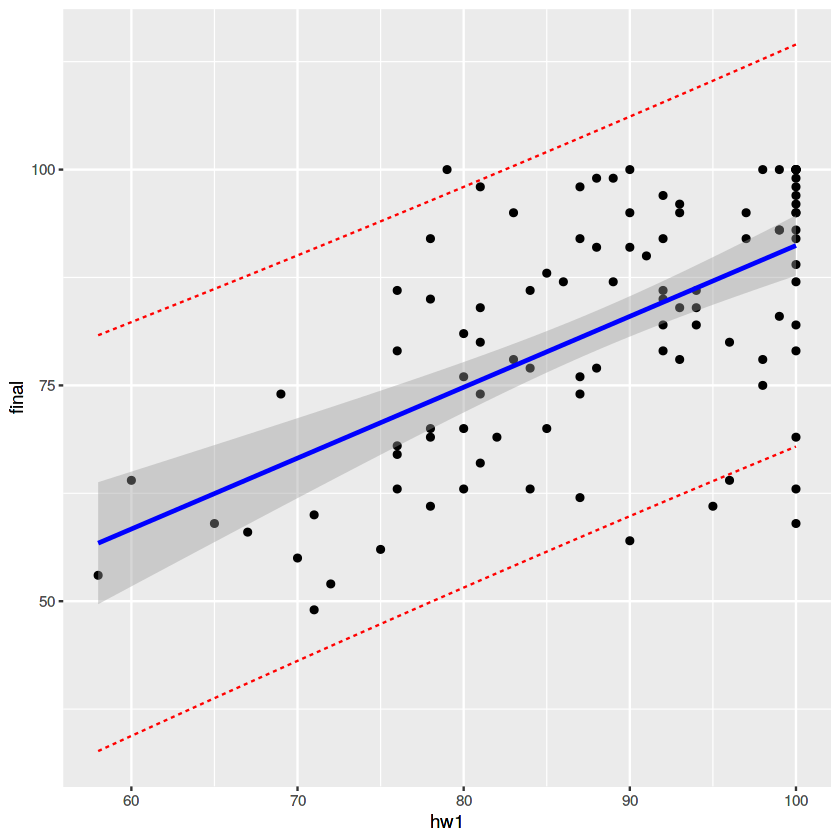

In [46]:
# Confidence interval and prediction interval for our simple linear regression model.

# We use a simple linear regression model for the ease of visualization only,
# but we can similarly calculate the confidence interval and 
# prediction interval for regression models with multiple covariates.
ci <- predict(mod, interval = "prediction")

data_with_cis <- cbind(data, ci)

data_with_cis %>%
    ggplot(aes(x = hw1, y = final)) +
      geom_point() +
      geom_line(aes(y = lwr), color = "red", linetype = "dashed") +
      geom_line(aes(y = upr), color = "red", linetype = "dashed") +
      geom_smooth(method = "lm", color = "blue")

Similar to what we observe between standard errors of the mean estimator and the
sample standard deviation, the confidence interval (about the mean) is much
narrower than the prediction interval.

Now, suppose that we received an 80 on `hw1`. 
We are able to produce our confidence interval and prediction interval using `predict`.$^2$

In [26]:
# Confidence interval
predict(mod,
        newdata = tibble(hw1 = 80),
        interval = "confidence",
        level = .95)

# Prediction interval
predict(mod,
        newdata = tibble(hw1 = 80),
        interval = "prediction",
        level = .95)

fit,lwr,upr
74.78484,71.86051,77.70918


fit,lwr,upr
74.78484,51.57483,97.99485


# Goodness of Fit

Now we have a working simple linear regression model and are able to quantify
the the uncertainty in the model.
But we would still like to know how well our model fits the data overall.

Recall when fitting our regression on a specific dataset, we aim to minimize the
*sum of squared residuals* (or *sum of squared errors (SSE)*):
\begin{align}
  \sum_{i=1}^{n} \hat{\varepsilon}_i^2 
    & = \sum_{i=1}^{n} (Y_i - \hat{Y}_i) ^ 2  \\
    & = \sum_{i=1}^{n} \big(Y_i - (\hat{\beta}_0 + \hat{\beta}_1 X_i)\big)^2.
\end{align}

Then we are able to estimate the *root mean square error (RMSE)* or the
*residual standard error* as 

$$
\hat{\varepsilon}_i =
\sqrt{\frac{1}{n}\sum_{i=1}^{n} (Y_i - \hat{Y}_i) ^ 2}.
$$ 

The lower it is, the better---since the goal is to minimize the residuals.

Another common metric for goodness of fit is $R^2$, defined as:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(Y_i - \hat{Y}_i)^2}
               {\sum_{i=1}^{n}(Y_i - \bar{Y})^2}.
$$

This metric measures how good the full model (with all covariates) is
compared to the reduced model (with an intercept only), or, how much of the
variation in the dataset can be explained compared to the total variation.
$R^2$ ranges from 0 to 1. In general, the higher $R^2$ is, the better the model
fits the data.

Both RMSE and $R^2$ can be found in the regression summary table by calling:

In [28]:
summary(mod)


Call:
lm(formula = final ~ hw1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.206  -7.387   1.005   8.494  26.036 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.1007     9.9160   0.918    0.361    
hw1           0.8211     0.1117   7.348 6.08e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.6 on 98 degrees of freedom
Multiple R-squared:  0.3552,	Adjusted R-squared:  0.3486 
F-statistic: 53.99 on 1 and 98 DF,  p-value: 6.078e-11


$R^2$ is represented by "Multiple R-squared" (i.e., 0.3552) in the table above.
**RMSE** is shown as "Residual standard error" (i.e., 11.5).

Can we do better given that we have data for all five homeworks?
Though including all five homework scores will (hopefully) best predict the final
exam scores, we would like to make prediction as early as possible.
Now let's look at the summary table of the multi regression model.

In [29]:
summary(multi_mod)


Call:
lm(formula = final ~ hw1 + hw2 + hw3, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.656  -6.610   1.058   6.830  24.180 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.68252   10.76825   0.342 0.733114    
hw1          0.40084    0.15039   2.665 0.009025 ** 
hw2          0.28340    0.13298   2.131 0.035630 *  
hw3          0.24534    0.06981   3.514 0.000675 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.84 on 96 degrees of freedom
Multiple R-squared:  0.4488,	Adjusted R-squared:  0.4315 
F-statistic: 26.05 on 3 and 96 DF,  p-value: 2.051e-12


From the summary table above, both $R^2$ (0.4488) and **RMSE** (10.84) indicate that our multi
linear regression fits the data better than the simple linear regression.

The following code visualizes how the fit changes if we include the first $k$ 
homework scores in the model as $k$ increases.

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

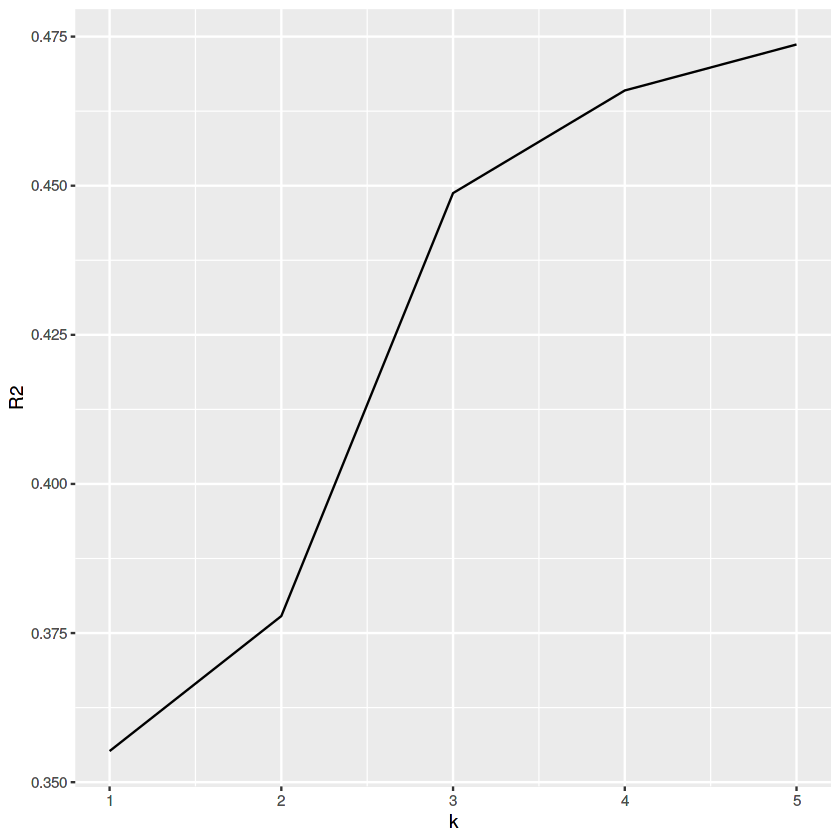

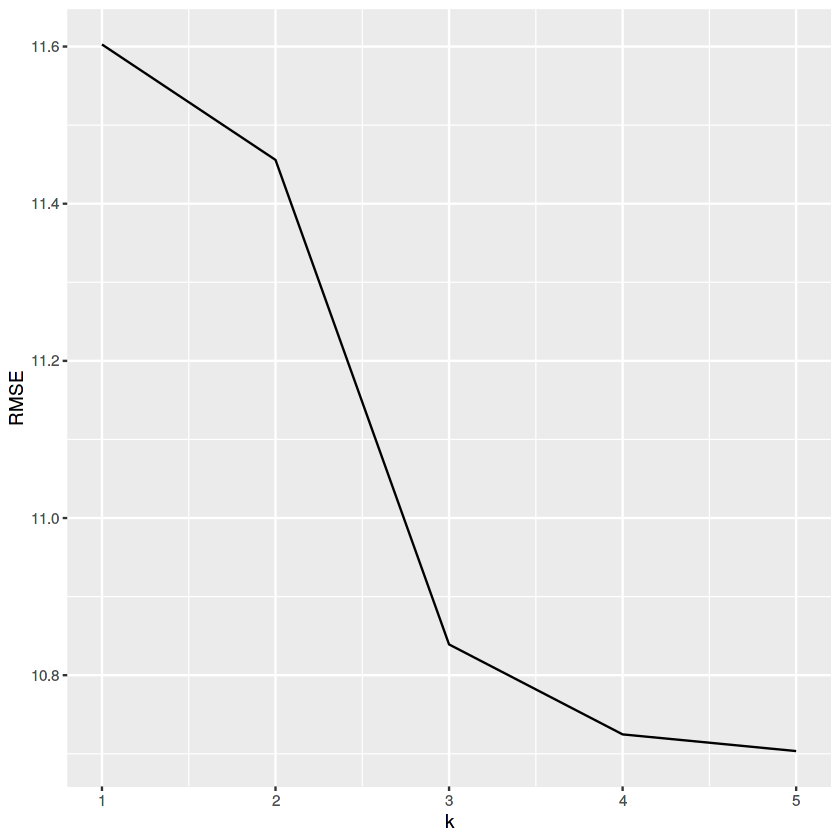

In [30]:
eval_perf <- function(k, data) {
  # This function fits a model with the first k columns of data
  form <- reformulate(colnames(data)[1:k], response = "final")
  my_mod <- lm(form, data = data)
  
  R2 <- summary(my_mod)$r.squared
  RMSE <- summary(my_mod)$sigma
  # RMSE with degree of freedom n-k-1, but let's not get into that rabbit hole here...
  # sqrt(c(crossprod(my_mod$residuals)) / (length(my_mod$residuals) - (k + 1)))
  c(k, R2, RMSE)
}
perf <- as_tibble(t(sapply(1:5, function(k)
eval_perf(k, data))))
colnames(perf) <- c("k", "R2", "RMSE")
# Number of homework scores vs. R2
ggplot(data = perf, aes(x = k, y = R2)) +
  geom_line()
# Number of homework scores vs. RMSE
ggplot(data = perf, aes(x = k, y = RMSE)) +
  geom_line()

It seems like we can achieve almost the best performance after observing the
first 3 homework scores as the $R^2$ and RMSE curve plateaus when $k >= 3$,
i.e., including additional covariates does not substantialy improve the 
goodness of fit.

# Final prediction 

Now, let's go back to the original question we were trying to answer:
when we have observed our first 3 homework scores as **100, 85, and 95,** can we
predict our final exam scores?

Well, by plugging in those numbers in our multiple regression model, we get:

In [44]:
# Your code here! 
# Use predict() with your multiple linear regression model 
# to predict the final test score, given the three hw scores listed above.

# HINT: You can use the following syntax:
# predict(mod, newdata = tibble(a = 1, b = 2, c = 3))
# Replace mod and update the tibble with correct columns / values.

# START solution

pred <- predict(multi_mod, newdata = tibble(hw1 = 100, hw2 = 85, hw3 = 95))
pred

# END solution

1 
91.16204

On average, we expect our final exam score to be 91.16.

Finally, we successfully built and evaluated our final exam scores prediction
model. Knowing the predicted final exam scores, now we can happily sit back and
sip our coffee. The sky is bluer than ever before ... or is it?

# Discussion

* Nothing we discussed here involves proving causation.
Is that sufficient for predicting a student's final score?
If so, what are other situations where we do need to make causal claims?
(We will talk about causal inference later in this quarter!)
* Are you always better off if you have a higher $R^2$ (or RMSE)?
If not, how can we better evaluate our model?
* In our final prediction, if we calculate the prediction interval, 
the upper bound is actually greater than 100, the max possible final score.
How should we interpret the prediction interval in that case?

# Footnotes

1. The confidence interval and prediction interval shown in the plot is
based on the simple linear regression model (one covariate) as it's hard to
visualize how these intervals change as a function of covariates when there is
more than one covariate.
1. In [HW5](https://5harad.com/mse125/#hw5) we ask you to use `predict.lm`, which is the same as using `predict()` with model fit from `lm()`.
When you use `predict()` with a model that was fit from `lm()`, `R` is smart
enough to actually call `predict.lm()`. So it's also fine to just use `predict()` for the homework.